<a href="https://colab.research.google.com/github/gabsgoms10/UFABCBCC.-2021.3-/blob/main/Trabalho1_BCC_gdn_v_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elitização no Prouni


O acesso ao ensino superior no Brasil ainda é um privilégio de poucos. Com base nisso, resolveu-se medir o nível de elitização das faculdades brasileiras analisando a dificuldade de entrar e permanecer em uma universidade, através do valor das mensalidades e quantidade de oferta de bolsas de estudo.

Definindo indices tangiveis de elitização

# Criando Índice de elitização

In [ ]:
 # importando bibliotecas relevantes para a analise
 import pandas as pd
 import numpy as np
 import matplotlib as pltt
 import seaborn as sns
 import numpy.linalg as nlg
 import matplotlib.pyplot as plt
 %matplotlib inline


In [ ]:
 # lendo o arquivo que está alocado no google drive.
df = pd.read_csv("https://drive.google.com/u/3/uc?id=1t_crQcHMbphSnNHw7O4lM4u_9WAdOC1I&export=download", error_bad_lines=False, sep=',').fillna(0)
 # Mostrando o formato da tabela para orientar o usuário.
print("O formato da tabela é:", df.shape)
 # Mostrando um exemplo da base de dados, no caso, as primeiras 20 linhas.
df.head(20)

O formato da tabela é: (41447, 20)


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_external_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
5,Bacharelado,Integral,9650.00,8.0,15.0,0.0,0.0,65781564964,Medicina,Presidente Prudente,SP,MzUwODAzNjQxNDA2,Universidade do Oeste Paulista - UNOESTE,CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDE...,657815,Medicina,738.92,728.86,0.00,0.00
6,Bacharelado,Integral,9564.00,3.0,5.0,0.0,0.0,65788486984,Medicina,Marilia,SP,MzUwOTAzODI5MDA1,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,657884,Medicina,744.16,735.00,0.00,0.00
7,Bacharelado,Integral,9350.00,4.0,3.0,0.0,0.0,65861111850254,Medicina,Sao Joao Del Rei,MG,MzExMTA1ODYyNTAw,Centro Universitário Presidente Tancredo de Al...,UNIDADE SEDE (UNIDADE) - Fábricas,658611,Medicina,747.84,736.68,0.00,0.00
8,Bacharelado,Integral,9208.00,7.0,5.0,0.0,0.0,658099184724,Medicina,Cuiaba,MT,NTEwNDAxNzAzNDAz,Universidade de Cuiabá - UNIC/UNIME,UNIC - BEIRA RIO (SEDE) - Jardim Europa,658099,Medicina,735.40,725.36,0.00,0.00
9,Bacharelado,Integral,9048.00,13.0,4.0,0.0,0.0,10505911785244,Medicina,Lauro de Freitas,BA,MjkwNTAyMTE5MjA3,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,105059,Medicina,741.04,730.36,0.00,0.00


In [ ]:
mensalidade = df["mensalidade"].to_numpy()
mensalidade_normalizada = mensalidade/nlg.norm(mensalidade)
mensalidade_normalizada 


array([0.0565136 , 0.05558909, 0.05490647, ..., 0.00078554, 0.00078554,
       0.00078554])

In [ ]:
# organizando os dados para junta-los com o objetivo de uma melhor visualização
bolsa_integral = df["bolsa_integral_cotas"].to_numpy() + df["bolsa_integral_ampla"].to_numpy()
bolsa_parcial = df["bolsa_parcial_cotas"].to_numpy() + df["bolsa_parcial_ampla"].to_numpy()	
bolsa_integral_normalizada = bolsa_integral/nlg.norm(bolsa_integral)
bolsa_parcial_normalizada = bolsa_parcial/nlg.norm(bolsa_parcial)
bolsa_integral_normalizada


array([0.02921649, 0.00100747, 0.00705226, ..., 0.00100747, 0.00100747,
       0.00402986])

In [ ]:
# definindo o grau de elitização com base na mensalidade, e adicionando pesos a quantidade de bolsas disponibilizada pela faculdade 0.5 para bolsas integrais e 0.25 para parciais
grau_de_eletizacao = mensalidade_normalizada - bolsa_integral_normalizada*0.5 - bolsa_parcial_normalizada*0.25
grau_de_eletizacao.tolist()
df["Índice de elitização"] = grau_de_eletizacao.tolist()
df = df[['Índice de elitização','grau','turno','mensalidade','bolsa_integral_cotas','bolsa_integral_ampla','bolsa_parcial_cotas','bolsa_parcial_ampla','curso_id','curso_busca','cidade_busca','uf_busca','cidade_filtro','universidade_nome','campus_nome','campus_external_id','nome','nota_integral_ampla','nota_integral_cotas','nota_parcial_ampla','nota_parcial_cotas']]
df["Indice_de_elitização"] = df['Índice de elitização']
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Índice de elitização,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_external_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Indice_de_elitização
0,0.041905,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00,0.041905
1,0.055085,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00,0.055085
2,0.049700,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64,0.049700
3,0.052239,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00,0.052239
4,0.051419,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26,0.051419
5,0.042950,Bacharelado,Integral,9650.00,8.0,15.0,0.0,0.0,65781564964,Medicina,Presidente Prudente,SP,MzUwODAzNjQxNDA2,Universidade do Oeste Paulista - UNOESTE,CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDE...,657815,Medicina,738.92,728.86,0.00,0.00,0.042950
6,0.050020,Bacharelado,Integral,9564.00,3.0,5.0,0.0,0.0,65788486984,Medicina,Marilia,SP,MzUwOTAzODI5MDA1,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,657884,Medicina,744.16,735.00,0.00,0.00,0.050020
7,0.049314,Bacharelado,Integral,9350.00,4.0,3.0,0.0,0.0,65861111850254,Medicina,Sao Joao Del Rei,MG,MzExMTA1ODYyNTAw,Centro Universitário Presidente Tancredo de Al...,UNIDADE SEDE (UNIDADE) - Fábricas,658611,Medicina,747.84,736.68,0.00,0.00,0.049314
8,0.045993,Bacharelado,Integral,9208.00,7.0,5.0,0.0,0.0,658099184724,Medicina,Cuiaba,MT,NTEwNDAxNzAzNDAz,Universidade de Cuiabá - UNIC/UNIME,UNIC - BEIRA RIO (SEDE) - Jardim Europa,658099,Medicina,735.40,725.36,0.00,0.00,0.045993
9,0.042570,Bacharelado,Integral,9048.00,13.0,4.0,0.0,0.0,10505911785244,Medicina,Lauro de Freitas,BA,MjkwNTAyMTE5MjA3,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,105059,Medicina,741.04,730.36,0.00,0.00,0.042570




# Arroz com Feijão

In [ ]:
# organizando os dados por ordem de elitização
df.sort_values("Índice de elitização", ascending=False)

,Índice de elitização,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_external_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Indice_de_elitização
1,0.055085,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00,0.055085
3,0.052239,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00,0.052239
4,0.051419,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26,0.051419
6,0.050020,Bacharelado,Integral,9564.00,3.0,5.0,0.0,0.0,65788486984,Medicina,Marilia,SP,MzUwOTAzODI5MDA1,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,657884,Medicina,744.16,735.00,0.00,0.00,0.050020
2,0.049700,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64,0.049700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,-0.032526,Bacharelado,Matutino,1108.00,42.0,35.0,0.0,0.0,658099168171,Direito,Cuiaba,MT,NTEwNDAxNzAzNDAz,Universidade de Cuiabá - UNIC/UNIME,UNIC - BEIRA RIO (SEDE) - Jardim Europa,658099,Direito,583.34,577.72,0.00,0.00,-0.032526
24617,-0.036144,Licenciatura,Curso a Distância,325.00,32.0,19.0,74.0,43.0,2005674793775,Pedagogia,Rolim de Moura,RO,MTEwMjAwNjAwMjg4,Faculdade Educacional da Lapa - FAEL,RO - ROLIM DE MOURA - POLO EAD - Centro,2005674,Pedagogia,523.62,480.58,450.00,450.00,-0.036144
34198,-0.036260,Licenciatura,Curso a Distância,269.00,58.0,17.0,0.0,0.0,1051535893805,Pedagogia,Breves,PA,MTUwMjAwNTAxODA4,Universidade Pitágoras Unopar,BREVES/PA (1051535) - Aeroporto,1051535,Pedagogia,547.68,543.48,0.00,0.00,-0.036260
24501,-0.049811,Licenciatura,Curso a Distância,325.00,20.0,50.0,44.0,112.0,658320793775,Pedagogia,Lapa,PR,NDExMDAzNjEzMjA1,Faculdade Educacional da Lapa - FAEL,CAMPUS - LAPA - BOQUEIRÃO - Boqueirão,658320,Pedagogia,450.00,450.00,450.00,450.00,-0.049811


In [ ]:
#Média, moda e mediana das mesalidades
print("Média:", df["mensalidade"].mean())
print("Mediana:", df["mensalidade"].median())
print("Mensalidade máxima:", df["mensalidade"].max())
print("Mensalidade mínima:", df["mensalidade"].min())
print("Moda:")
df[["mensalidade"]].mode()


Média: 622.6369657635327
Mediana: 393.35
Mensalidade máxima: 9999.99
Mensalidade mínima: 139.0
Moda:


,mensalidade
0,299.0


In [ ]:
 # Achando fontes disponíveis para os gráficos
 font_paths = pltt.font_manager.findSystemFonts()
 font_objects = pltt.font_manager.createFontList(font_paths)
 font_names = [f.name for f in font_objects]
 print(font_names)


['Liberation Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Mono', 'Humor Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
 # Tiramos colunas indesejadas com o df.drop
 df.drop(['curso_id', 'cidade_filtro', 'campus_external_id'], axis=1, inplace=True)
 df.head()

 
 # Achando fontes disponíveis para os gráficos
 font_paths = pltt.font_manager.findSystemFonts()
 font_objects = pltt.font_manager.createFontList(font_paths)
 font_names = [f.name for f in font_objects]
 print(font_names)


['Liberation Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Mono', 'Humor Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


# Cursos Elitizados

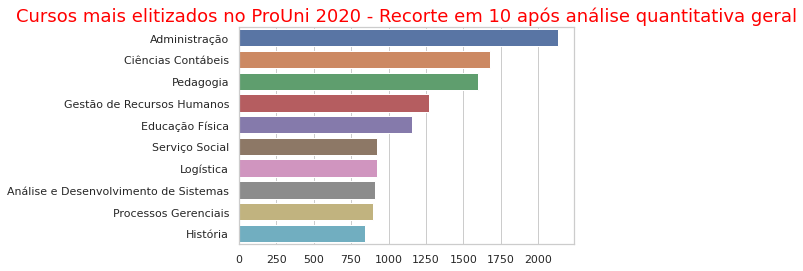

In [ ]:
 # Queremos saber os cursos mais elitizados, então pegamos nossa base de dados e alocamos na variável quando o índice é maior que zero.
 eli = df.loc[df["Índice de elitização"]>0]

 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Usa se o head para pegar os dez resultados mais significativos
 Cursos_elitizados = pd.DataFrame([eli.curso_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 sns.set_style('whitegrid')
 sns.color_palette("dark")
 Cursos_elitizadosG = sns.barplot(x='value', y='variable', data=Cursos_elitizados)
 Cursos_elitizadosG.set(ylabel=None)
 Cursos_elitizadosG.set(xlabel=None)
 Cursos_elitizadosG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="red")
 # para dar ver o gráfico
 plt.savefig('output.png')

Text(0.5, 1.0, 'Universidades mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

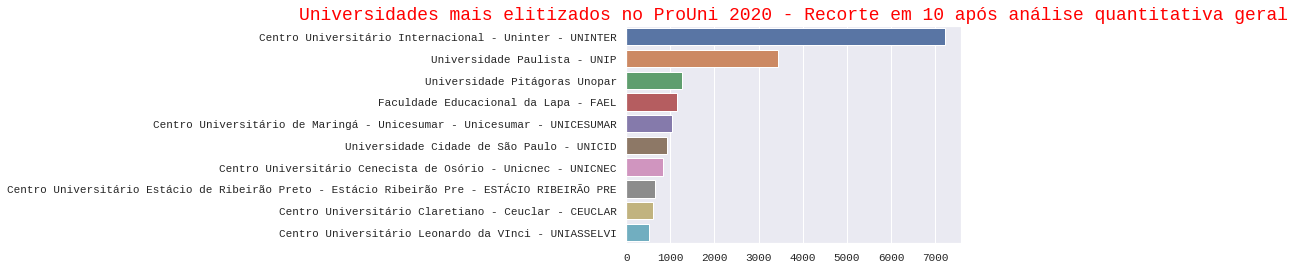

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que há repetição de Universidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Universidades_elitizadas = pd.DataFrame([eli.universidade_nome.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Universidades_elitizadssG = sns.barplot(x='value', y='variable', data=Universidades_elitizadas)
 Universidades_elitizadssG.set(ylabel=None)
 Universidades_elitizadssG.set(xlabel=None)
 Universidades_elitizadssG.set_title('Universidades mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="red")

Text(0.5, 1.0, 'Graus mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

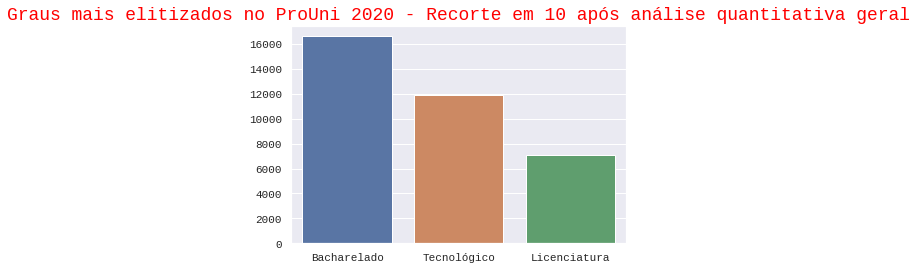

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Grau.
 # Usa se o head para pegar os dez resultados mais significativos
 Grau_elitizado = pd.DataFrame([eli.grau.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Grau_elitizadoG = sns.barplot(x='variable', y='value', data=Grau_elitizado)
 Grau_elitizadoG.set(ylabel=None)
 Grau_elitizadoG.set(xlabel=None)
 Grau_elitizadoG.set_title('Graus mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="red")

Text(0.5, 1.0, 'Estados mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

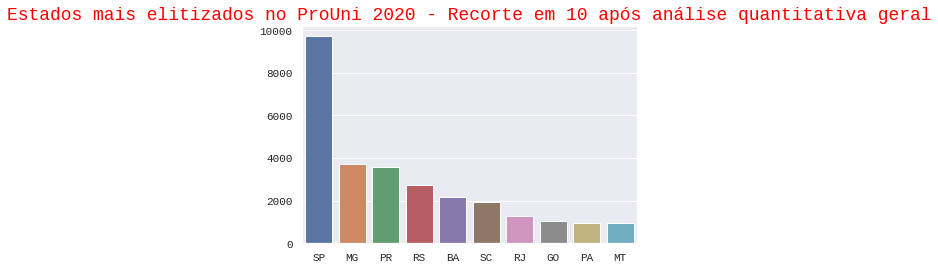

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Estado.
 # Usa se o head para pegar os dez resultados mais significativos
 Uf_elitizados = pd.DataFrame([eli.uf_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Uf_elitizadosG = sns.barplot(x='variable', y='value', data=Uf_elitizados)
 Uf_elitizadosG.set(ylabel=None)
 Uf_elitizadosG.set(xlabel=None)
 Uf_elitizadosG.set_title("Estados mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral", fontsize=18, color="red")

Text(0.5, 1.0, 'Cidades mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

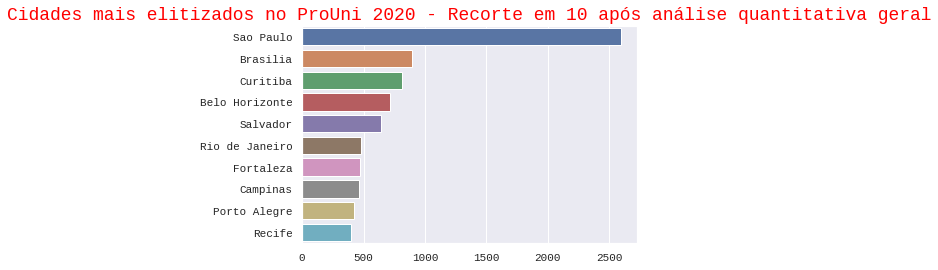

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete a Cidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Cidade_elitizados = pd.DataFrame([eli.cidade_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Cidade_elitizadosG = sns.barplot(x='value', y='variable', data=Cidade_elitizados)
 Cidade_elitizadosG.set(ylabel=None)
 Cidade_elitizadosG.set(xlabel=None)
 Cidade_elitizadosG.set_title("Cidades mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral", fontsize=18, color="red")

# Cursos não elitizados

Text(0.5, 1.0, 'Cursos menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

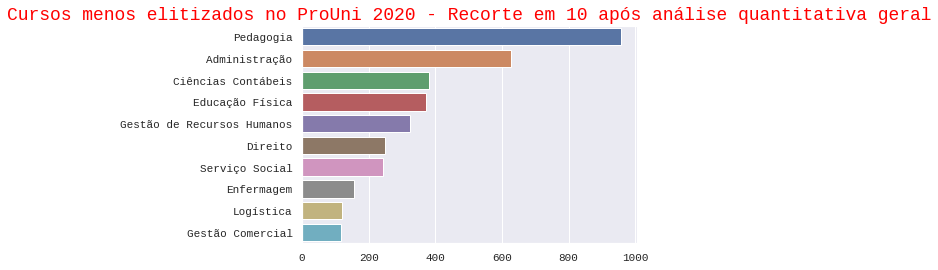

In [ ]:
 # Agora queremos saber os cursos não elitizados, então pegamos nossa base de dados e alocamos na variável quando o índice é menor que zero.
 neli = df.loc[df["Índice de elitização"]<=0]

 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Usa se o head para pegar os dez resultados mais significativos
 Cursos_nelitizados = pd.DataFrame([neli.curso_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Cursos_nelitizadosG = sns.barplot(x='value', y='variable', data=Cursos_nelitizados)
 Cursos_nelitizadosG.set(ylabel=None)
 Cursos_nelitizadosG.set(xlabel=None)
 Cursos_nelitizadosG.set_title('Cursos menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="red")

Text(0.5, 1.0, 'Universidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

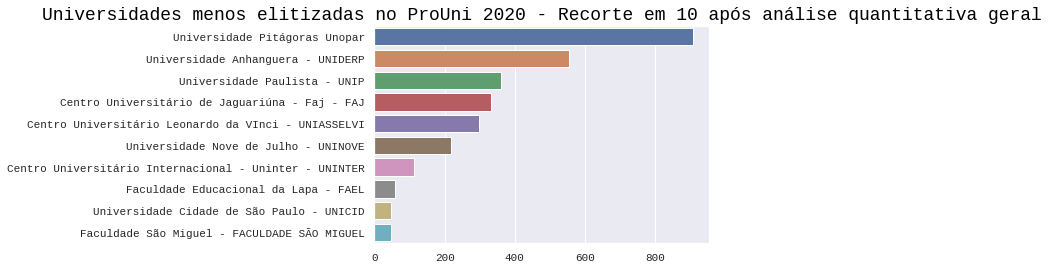

In [ ]:
 #Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que há repetição de Universidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Universidades_nelitizadas = pd.DataFrame([neli.universidade_nome.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Universidades_nelitizadasG = sns.barplot(x='value', y='variable', data=Universidades_nelitizadas)
 Universidades_nelitizadasG.set(ylabel=None)
 Universidades_nelitizadasG.set(xlabel=None)
 Universidades_nelitizadasG.set_title('Universidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

Text(0.5, 1.0, 'Graus menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

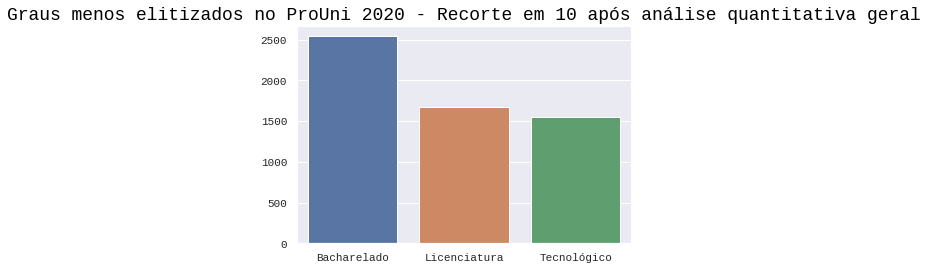

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Grau.
 # Usa se o head para pegar os dez resultados mais significativos
 Grau_nelitizado = pd.DataFrame([neli.grau.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Grau_nelitizadoG = sns.barplot(x='variable', y='value', data=Grau_nelitizado)
 Grau_nelitizadoG.set(ylabel=None)
 Grau_nelitizadoG.set(xlabel=None)
 Grau_nelitizadoG.set_title('Graus menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

Text(0.5, 1.0, 'Estados menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

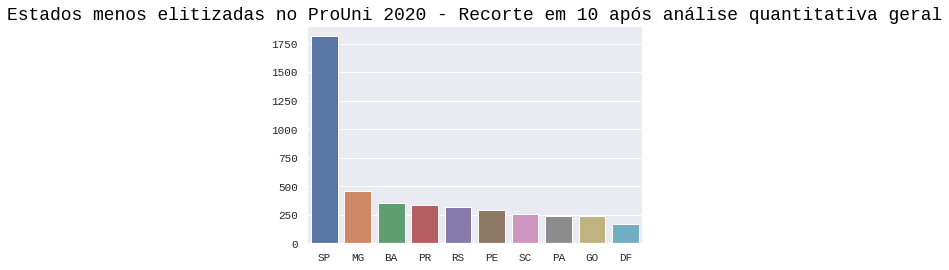

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Estado.
 # Usa se o head para pegar os dez resultados mais significativos
 Uf_nelitizado = pd.DataFrame([neli.uf_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Uf_nelitizadoG = sns.barplot(x='variable', y='value', data=Uf_nelitizado)
 Uf_nelitizadoG.set(ylabel=None)
 Uf_nelitizadoG.set(xlabel=None)
 Uf_nelitizadoG.set_title('Estados menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

Text(0.5, 1.0, 'Cidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

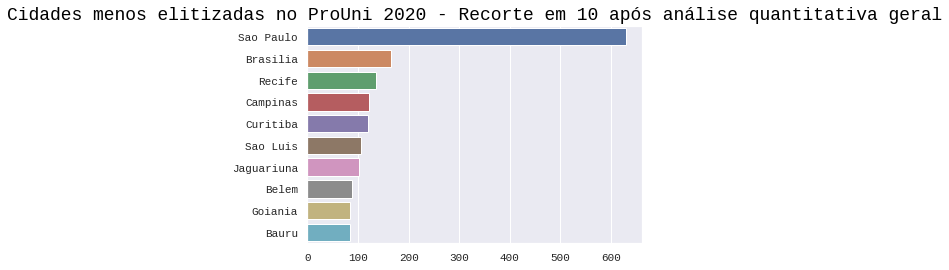

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete a Cidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Cidade_nelitizado = pd.DataFrame([neli.cidade_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Cidade_nelitizadoG = sns.barplot(x='value', y='variable', data=Cidade_nelitizado)
 Cidade_nelitizadoG.set(ylabel=None)
 Cidade_nelitizadoG.set(xlabel=None)
 Cidade_nelitizadoG.set_title('Cidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

#Cursos - Elitizados X Não Elitizados

Text(0.5, 1, 'Cursos menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

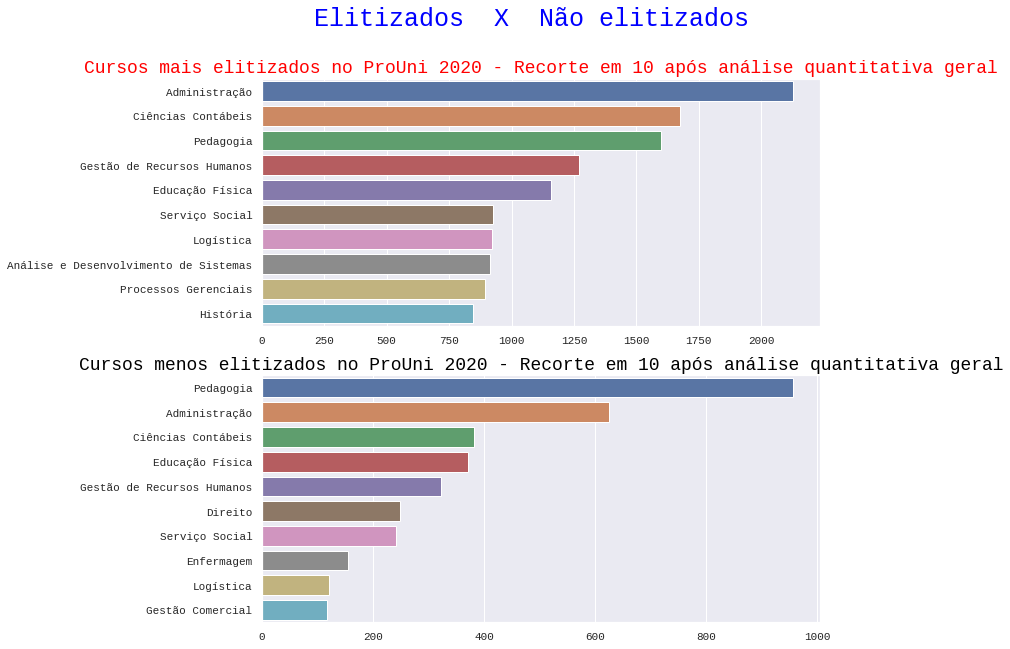

In [ ]:
 # Colocando os gráficos juntos para melhor vizualizar
 fig, axes = plt.subplots(2, 1, figsize=(10,10))
 sns.set(font='Liberation Mono')
 fig.suptitle("Elitizados  X  Não elitizados", fontsize=25, color="blue")
 # Cursos mais elitizados
 Cursos_elitizadosG = sns.barplot(x='value', y='variable', data=Cursos_elitizados, ax=axes[0])
 Cursos_elitizadosG.set(ylabel=None)
 Cursos_elitizadosG.set(xlabel=None)
 # Cursos menos elitizados
 Cursos_elitizadosG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1, fontsize=18, color="red")
 Cursos_nelitizadosG = sns.barplot(x='value', y='variable', data=Cursos_nelitizados, ax=axes[1])
 Cursos_nelitizadosG.set(ylabel=None)
 Cursos_nelitizadosG.set(xlabel=None)
 Cursos_nelitizadosG.set_title('Cursos menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1, fontsize=18, color="black")

Text(0.5, 1.0, 'Universidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

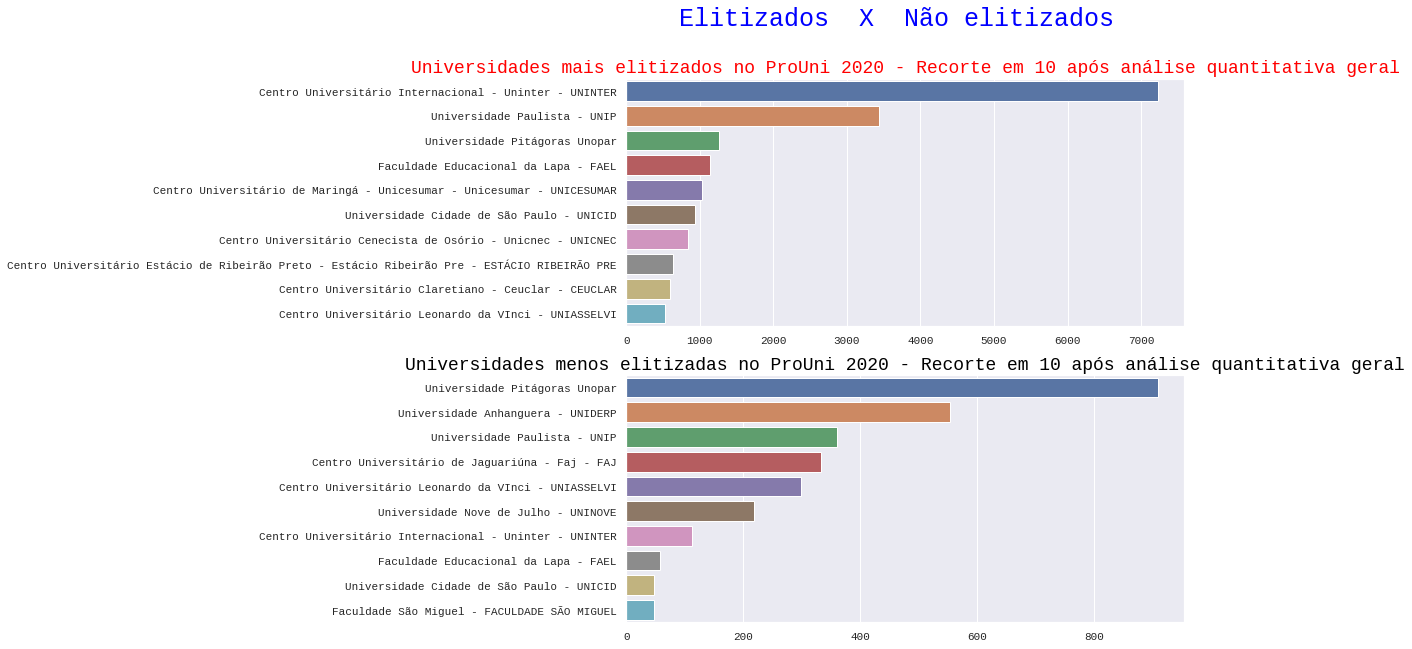

In [ ]:
 # Colocando os gráficos juntos para melhor vizualizar
 fig, axes = plt.subplots(2, 1, figsize=(10,10))
 fig.suptitle("Elitizados  X  Não elitizados", fontsize=25, color="blue")
 sns.set(font='Liberation Mono')
 # Cursos mais elitizados
 Universidades_elitizadssG = sns.barplot(x='value', y='variable', data=Universidades_elitizadas, ax=axes[0])
 Universidades_elitizadssG.set(ylabel=None)
 Universidades_elitizadssG.set(xlabel=None)
 Universidades_elitizadssG.set_title('Universidades mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="red")
 # Cursos menos elitizados
 Universidades_nelitizadas = pd.DataFrame([neli.universidade_nome.value_counts().head(10)]).melt()
 Universidades_nelitizadasG = sns.barplot(x='value', y='variable', data=Universidades_nelitizadas, ax=axes[1])
 Universidades_nelitizadasG.set(ylabel=None)
 Universidades_nelitizadasG.set(xlabel=None)
 Universidades_nelitizadasG.set_title('Universidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

Text(0.5, 1.05, 'Grau menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

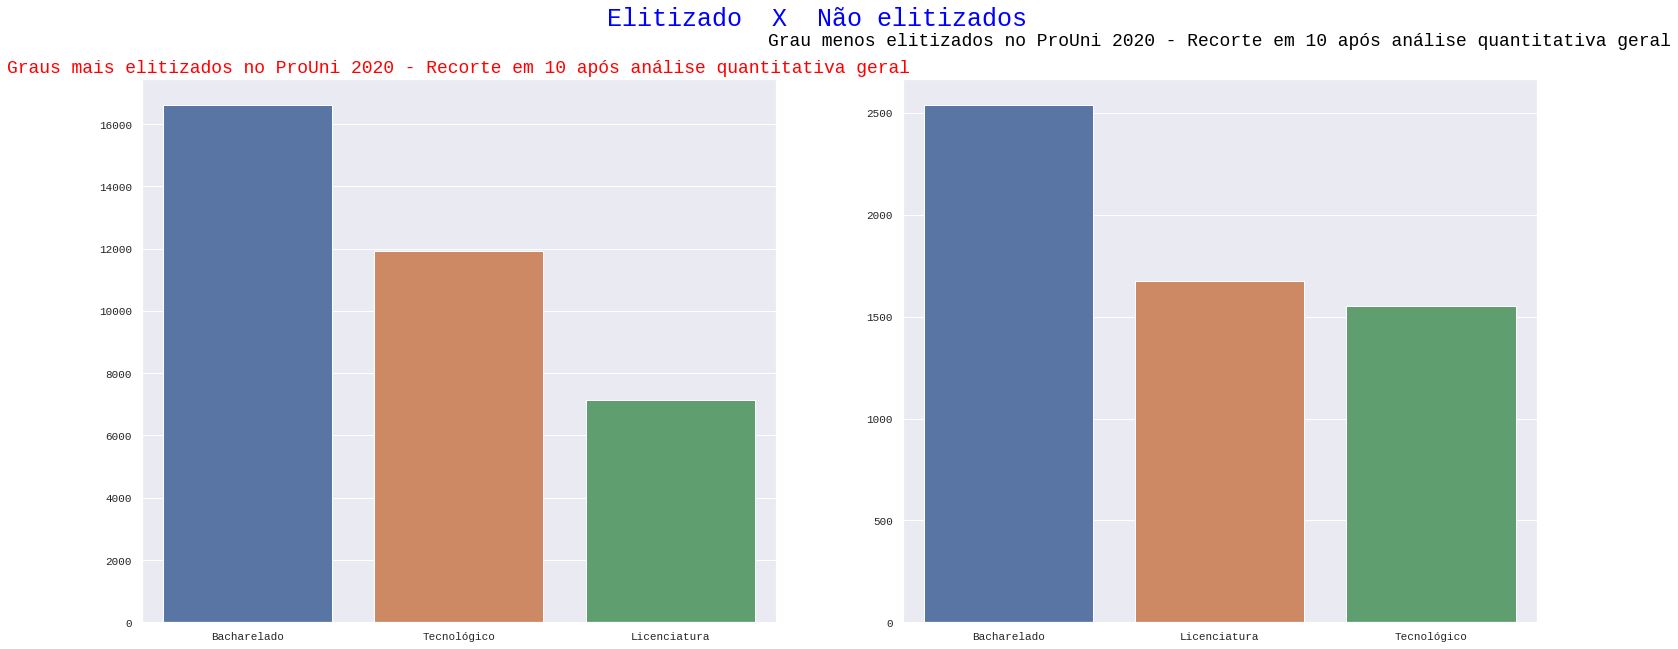

In [ ]:
 # Colocando os gráficos juntos para melhor vizualizar
 fig, axes = plt.subplots(1, 2, figsize=(25 ,10))
 sns.set(font='Liberation Mono')
 fig.suptitle("Elitizado  X  Não elitizados", fontsize=25, color="blue")
 # Cursos mais elitizados
 Grau_elitizadoG = sns.barplot(x='variable', y='value', data=Grau_elitizado, ax=axes[0])
 Grau_elitizadoG.set(ylabel=None)
 Grau_elitizadoG.set(xlabel=None)
 Grau_elitizadoG.set_title('Graus mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="red")
 # Cursos menos elitizados
 Grau_nelitizadoG = sns.barplot(x='variable', y='value', data=Grau_nelitizado, ax=axes[1])
 Grau_nelitizadoG.set(ylabel=None)
 Grau_nelitizadoG.set(xlabel=None)
 Grau_nelitizadoG.set_title('Grau menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral',y=1.05, fontsize=18, color="black")

Text(0.5, 1.0, 'Estados menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

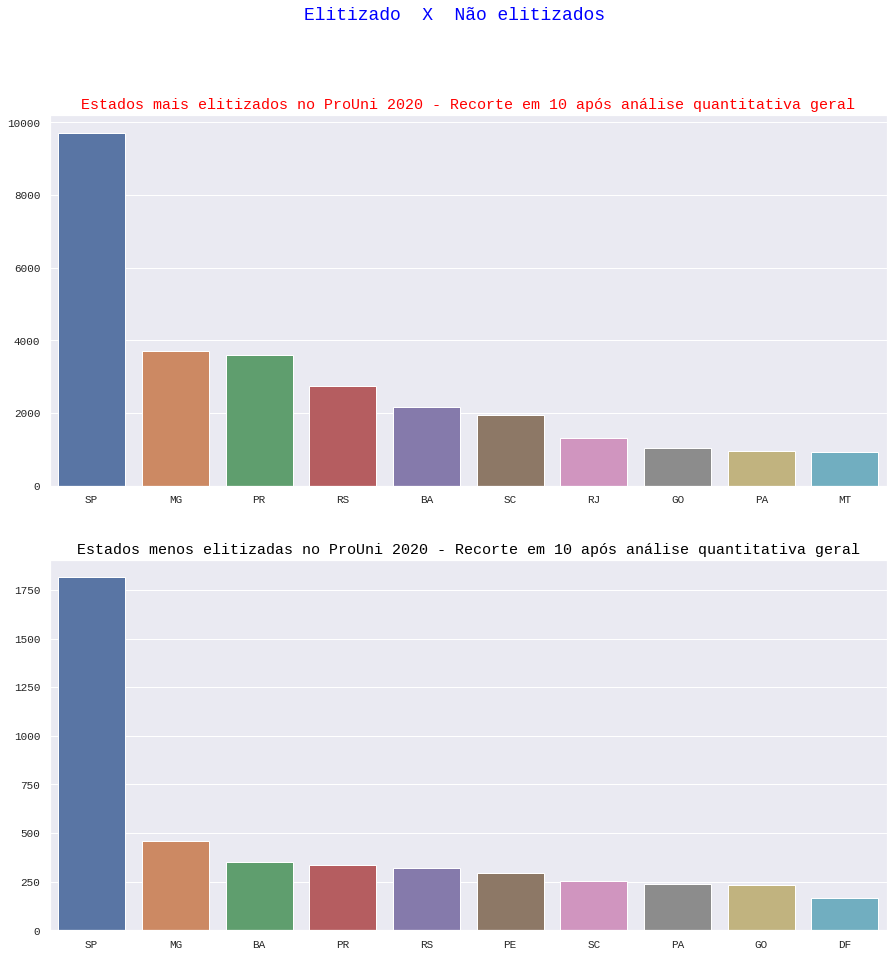

In [ ]:
 # Colocando os gráficos juntos para melhor vizualizar
 fig, axes = plt.subplots(2, 1, figsize=(15,15))
 sns.set(font='Liberation Mono')
 fig.suptitle("Elitizado  X  Não elitizados", fontsize=25, color="blue")
 # Cursos mais elitizados
 Uf_elitizadosG = sns.barplot(x='variable', y='value', data=Uf_elitizados, ax=axes[0])
 Uf_elitizadosG.set(ylabel=None)
 Uf_elitizadosG.set(xlabel=None)
 Uf_elitizadosG.set_title("Estados mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral", fontsize=15, color="red")
 # Cursos menos elitizados
 Uf_nelitizadoG = sns.barplot(x='variable', y='value', data=Uf_nelitizado, ax=axes[1])
 Uf_nelitizadoG.set(ylabel=None)
 Uf_nelitizadoG.set(xlabel=None)
 Uf_nelitizadoG.set_title('Estados menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=15, color="black")

Text(0.5, 1.0, 'Cidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

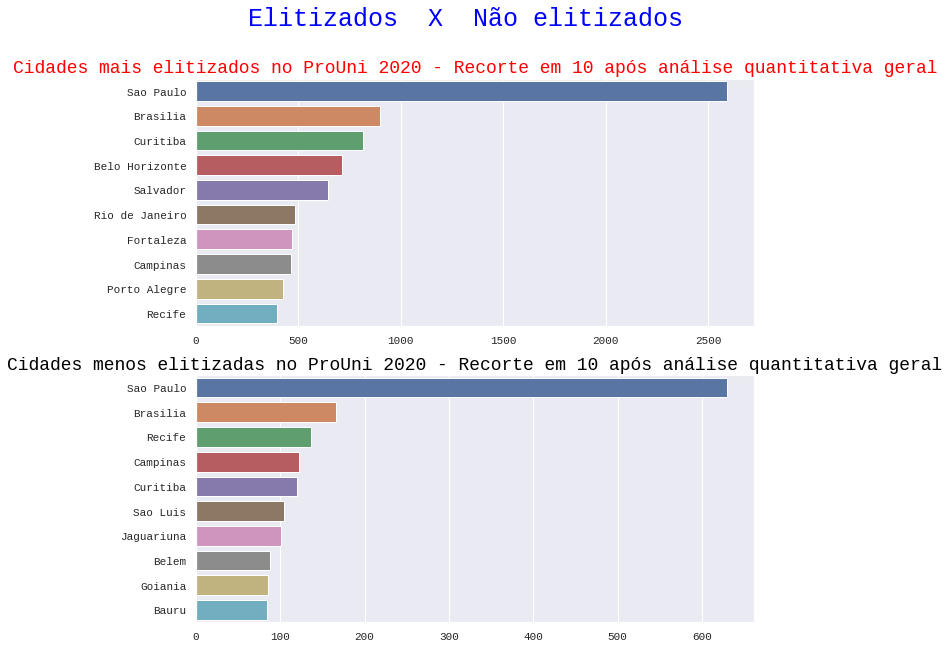

In [ ]:
 # Colocando os gráficos juntos para melhor vizualizar
 fig, axes = plt.subplots(2, 1, figsize=(10,10))
 sns.set(font='Liberation Mono')
 fig.suptitle("Elitizados  X  Não elitizados", fontsize=25, color="blue")
 # Cursos mais elitizados
 Cidade_elitizadosG = sns.barplot(x='value', y='variable', data=Cidade_elitizados, ax=axes[0])
 Cidade_elitizadosG.set(ylabel=None)
 Cidade_elitizadosG.set(xlabel=None)
 Cidade_elitizadosG.set_title("Cidades mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral", fontsize=18, color="red")
 # Cursos menos elitizados
 Cidade_nelitizadoG = sns.barplot(x='value', y='variable', data=Cidade_nelitizado, ax=axes[1])
 Cidade_nelitizadoG.set(ylabel=None)
 Cidade_nelitizadoG.set(xlabel=None)
 Cidade_nelitizadoG.set_title('Cidades menos elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

# Bolsas





Text(0.5, 1.0, 'Bolsas Integrais')

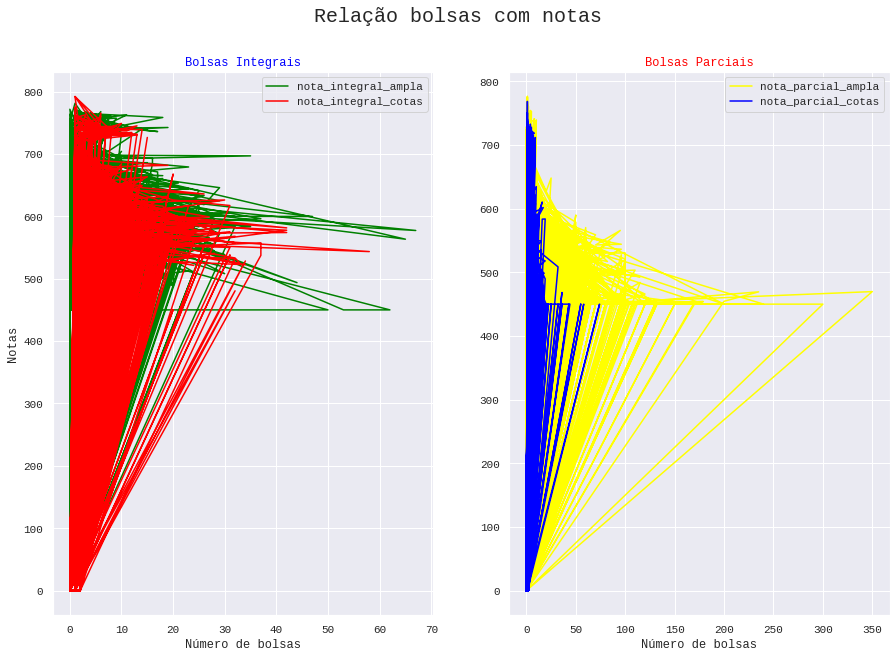

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(15,10))
 sns.set(font='Liberation Mono')
 fig.suptitle("Relação bolsas com notas", y=0.97, fontsize=20)
 Bi = df.plot(kind='line',x='bolsa_integral_ampla',y='nota_integral_ampla', color='green',ax=axes[0])
 Bi = df.plot(kind='line',x='bolsa_integral_cotas',y='nota_integral_cotas', color='red',ax=axes[0])
 Bp = df.plot(kind='line',x='bolsa_parcial_ampla',y='nota_parcial_ampla', color='yellow',ax=axes[1])
 Bp = df.plot(kind='line',x='bolsa_parcial_cotas',y='nota_parcial_cotas', color='blue',ax=axes[1])
 Bi.set(xlabel="Número de bolsas")
 Bp.set(xlabel="Número de bolsas")
 Bi.set(ylabel="Notas")
 Bp.set_title("Bolsas Parciais", Color="red")
 Bi.set_title("Bolsas Integrais", Color="blue")




# Cursos

Text(0.5, 1.0, 'Graus menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral')

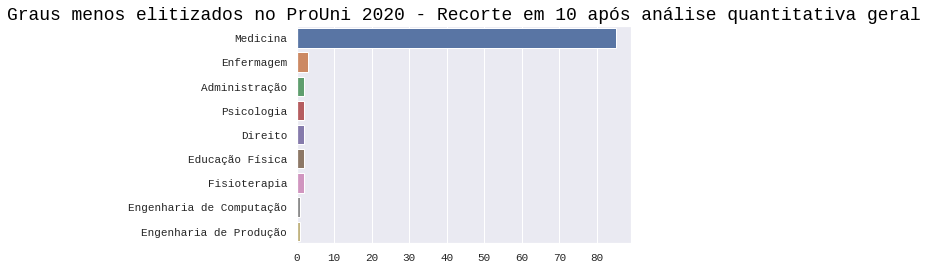

In [ ]:
 # Pegando a base de dados e recortando 
 # A tabela está organizada por índice de elitização
 df100 = df.head(100)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos100 = pd.DataFrame([df100.curso_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Cursos100G = sns.barplot(x='value', y='variable', data=Cursos100)
 Cursos100G.set(ylabel=None)
 Cursos100G.set(xlabel=None)
 Cursos100G.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 100', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 500')

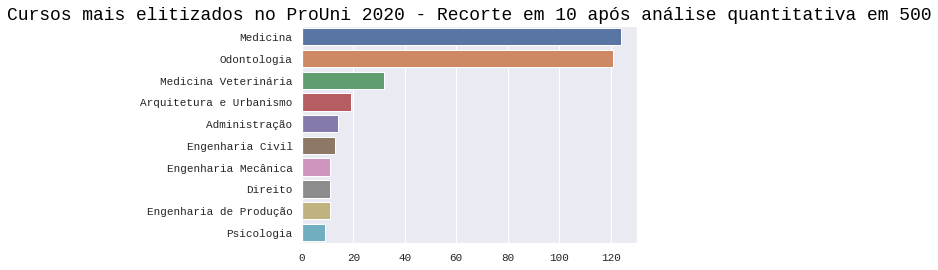

In [ ]:
 # Pegando a base de dados e recortando 
 # A tabela está organizada por índice de elitização
 df500 = df.head(500)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos500 = pd.DataFrame([df500.curso_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Cursos500G = sns.barplot(x='value', y='variable', data=Cursos500)
 Cursos500G.set(ylabel=None)
 Cursos500G.set(xlabel=None)
 Cursos500G.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 500', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 1000')

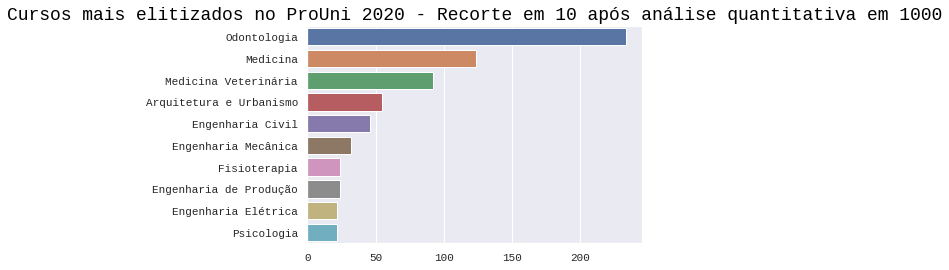

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df1000 = df.head(1000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos1000 = pd.DataFrame([df1000.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos1000G = sns.barplot(x='value', y='variable', data=Cursos1000)
 Cursos1000G.set(ylabel=None)
 Cursos1000G.set(xlabel=None)
 Cursos1000G.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 1000', fontsize=18, color="black")

Text(0.5, 1.0, 'Recorte em 10 após análise quantitativa em 1000')

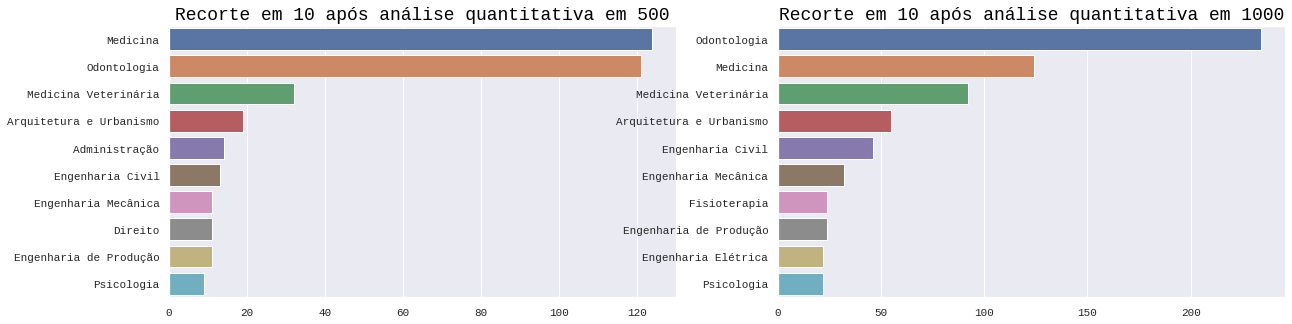

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(20,5))
 sns.set(font='Liberation Mono')
 Cursos500G = sns.barplot(x='value', y='variable', data=Cursos500, ax=axes[0])
 Cursos500G.set(ylabel=None)
 Cursos500G.set(xlabel=None)
 Cursos500G.set_title('Recorte em 10 após análise quantitativa em 500', fontsize=18, color="black")
 Cursos1000G = sns.barplot(x='value', y='variable', data=Cursos1000, ax=axes[1])
 Cursos1000G.set(ylabel=None)
 Cursos1000G.set(xlabel=None)
 Cursos1000G.set_title('Recorte em 10 após análise quantitativa em 1000', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 5 mil')

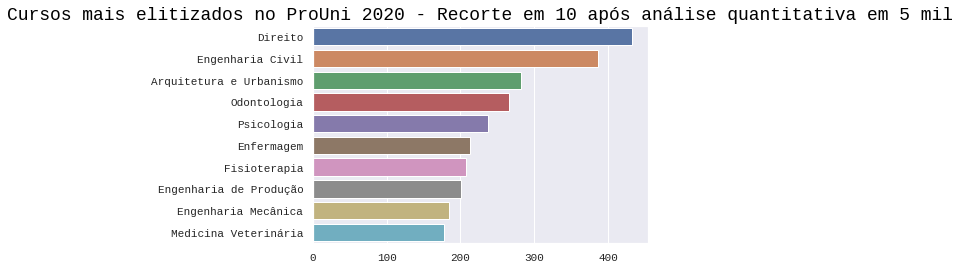

In [ ]:
 # Pegando a base de dados e recortando 
 # A tabela está organizada por índice de elitização
 df5k = df.head(5000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos5k = pd.DataFrame([df5k.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos5kG = sns.barplot(x='value', y='variable', data=Cursos5k)
 Cursos5kG.set(ylabel=None)
 Cursos5kG.set(xlabel=None)
 Cursos5kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 5 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 10 mil')

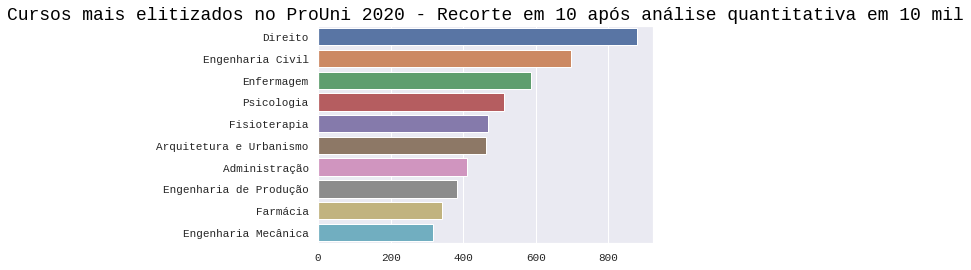

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df10K = df.head(10000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos10k = pd.DataFrame([df10K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos10kG = sns.barplot(x='value', y='variable', data=Cursos10k)
 Cursos10kG.set(ylabel=None)
 Cursos10kG.set(xlabel=None)
 Cursos10kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 10 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Recorte em 10 após análise quantitativa em 10 mil')

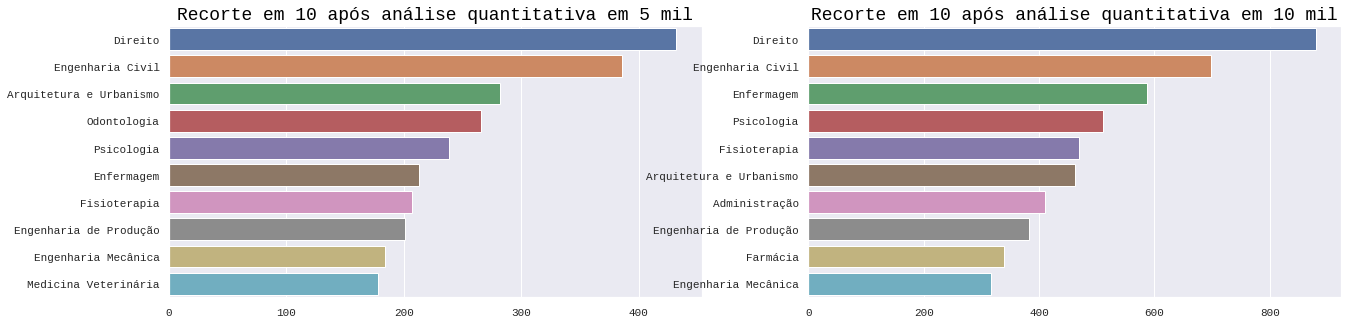

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(21,5))
 sns.set(font='Liberation Mono')
 Cursos5kG = sns.barplot(x='value', y='variable', data=Cursos5k, ax=axes[0])
 Cursos5kG.set(ylabel=None)
 Cursos5kG.set(xlabel=None)
 Cursos5kG.set_title('Recorte em 10 após análise quantitativa em 5 mil', fontsize=18, color="black")
 Cursos10kG = sns.barplot(x='value', y='variable', data=Cursos10k, ax=axes[1])
 Cursos10kG.set(ylabel=None)
 Cursos10kG.set(xlabel=None)
 Cursos10kG.set_title('Recorte em 10 após análise quantitativa em 10 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 15 mil')

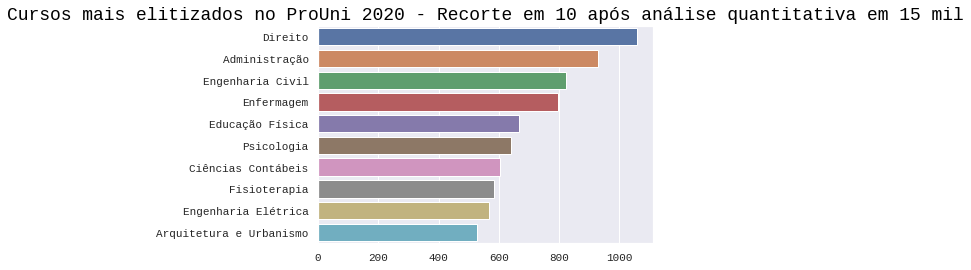

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df15K = df.head(15000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos15k = pd.DataFrame([df15K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos15kG = sns.barplot(x='value', y='variable', data=Cursos15k)
 Cursos15kG.set(ylabel=None)
 Cursos15kG.set(xlabel=None)
 Cursos15kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 15 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 20 mil')

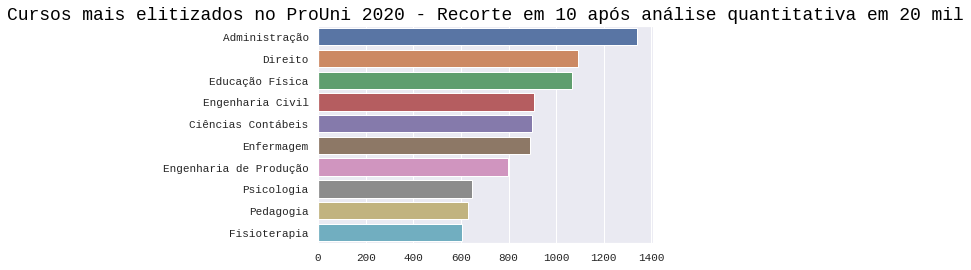

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df20K = df.head(20000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos20k = pd.DataFrame([df20K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos20kG = sns.barplot(x='value', y='variable', data=Cursos20k)
 Cursos20kG.set(ylabel=None)
 Cursos20kG.set(xlabel=None)
 Cursos20kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 20 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Recorte em 10 após análise quantitativa em 20 mil')

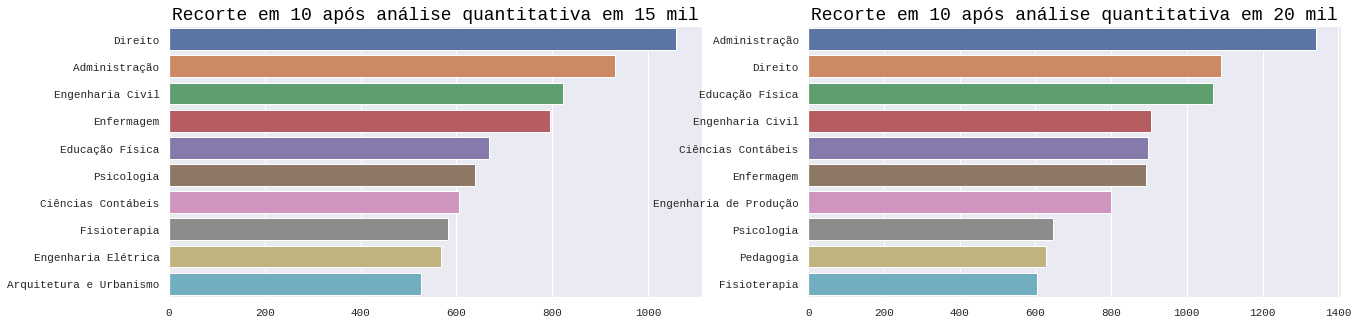

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(21,5))
 sns.set(font='Liberation Mono')
 Cursos15kG = sns.barplot(x='value', y='variable', data=Cursos15k, ax=axes[0])
 Cursos15kG.set(ylabel=None)
 Cursos15kG.set(xlabel=None)
 Cursos15kG.set_title('Recorte em 10 após análise quantitativa em 15 mil', fontsize=18, color="black")
 Cursos20kG = sns.barplot(x='value', y='variable', data=Cursos20k, ax=axes[1])
 Cursos20kG.set(ylabel=None)
 Cursos20kG.set(xlabel=None)
 Cursos20kG.set_title('Recorte em 10 após análise quantitativa em 20 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 25 mil')

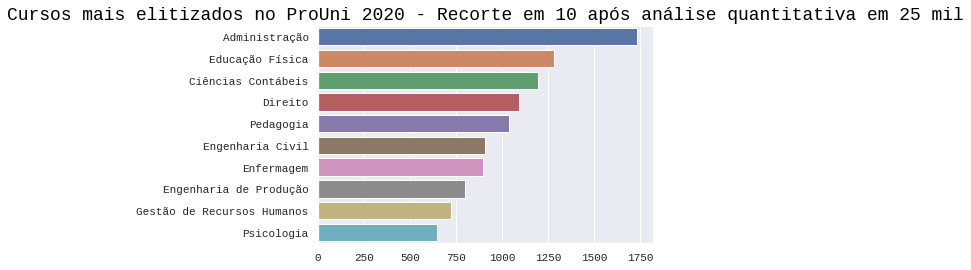

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df25K = df.head(25000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos25k = pd.DataFrame([df25K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos25kG = sns.barplot(x='value', y='variable', data=Cursos25k)
 Cursos25kG.set(ylabel=None)
 Cursos25kG.set(xlabel=None)
 Cursos25kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 25 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 30 mil')

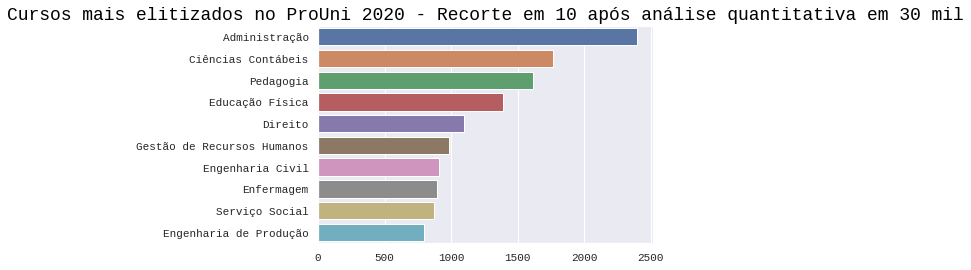

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df30K = df.head(30000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos30k = pd.DataFrame([df30K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos30kG = sns.barplot(x='value', y='variable', data=Cursos30k)
 Cursos30kG.set(ylabel=None)
 Cursos30kG.set(xlabel=None)
 Cursos30kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 30 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Recorte em 10 após análise quantitativa em 30 mil')

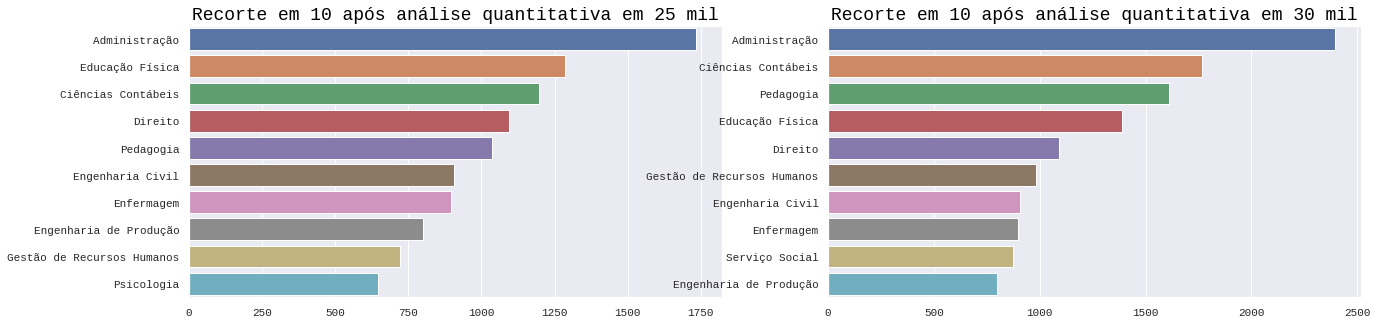

In [ ]:
 fig, axes = plt.subplots(1, 2, figsize=(21,5))
 sns.set(font='Liberation Mono')
 Cursos25kG = sns.barplot(x='value', y='variable', data=Cursos25k, ax=axes[0])
 Cursos25kG.set(ylabel=None)
 Cursos25kG.set(xlabel=None)
 Cursos25kG.set_title('Recorte em 10 após análise quantitativa em 25 mil', fontsize=18, color="black")
 Cursos30kG = sns.barplot(x='value', y='variable', data=Cursos30k, ax=axes[1])
 Cursos30kG.set(ylabel=None)
 Cursos30kG.set(xlabel=None)
 Cursos30kG.set_title('Recorte em 10 após análise quantitativa em 30 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 35 mil')

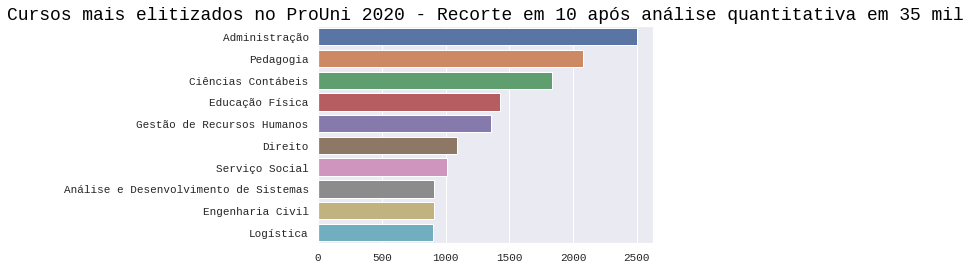

In [ ]:
 # Pegando a base de dados e recortando 
 # A tabela está organizada por índice de elitização
 df35K = df.head(35000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos35k = pd.DataFrame([df35K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos35kG = sns.barplot(x='value', y='variable', data=Cursos35k)
 Cursos35kG.set(ylabel=None)
 Cursos35kG.set(xlabel=None)
 Cursos35kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 35 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 40 mil')

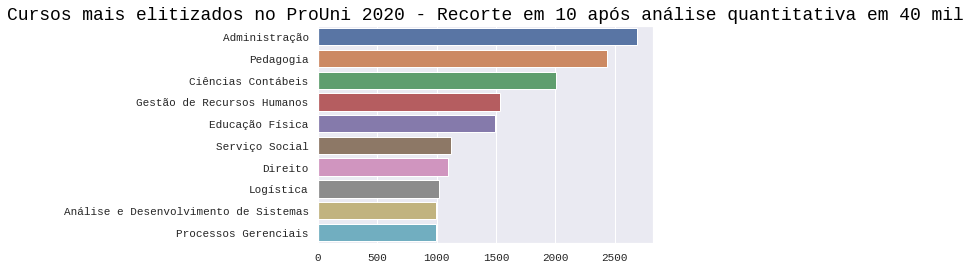

In [ ]:
 # Pegando a base de dados e recortando
 # A tabela está organizada por índice de elitização
 df40K = df.head(40000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos40k = pd.DataFrame([df40K.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico
 sns.set(font='Liberation Mono')
 Cursos40kG = sns.barplot(x='value', y='variable', data=Cursos40k)
 Cursos40kG.set(ylabel=None)
 Cursos40kG.set(xlabel=None)
 Cursos40kG.set_title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa em 40 mil', fontsize=18, color="black")

Text(0.5, 1.0, 'Cursos do ProUni 2020 - Recorte em 10 após análise quantitativa geral')

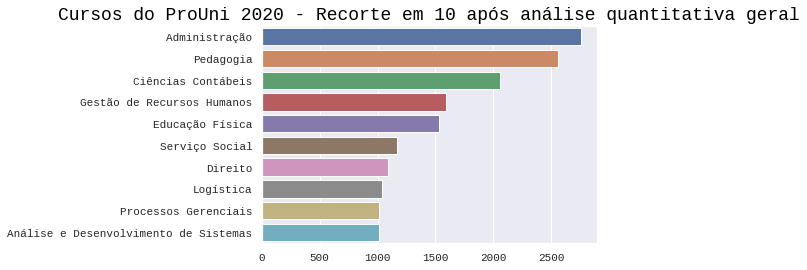

In [ ]:
 Cursos_geral = pd.DataFrame([df.curso_busca.value_counts().head(10)]).melt()
 sns.set(font='Liberation Mono')
 Cursos_geralG = sns.barplot(x='value', y='variable', data=Cursos_geral)
 Cursos_geralG.set(ylabel=None)
 Cursos_geralG.set(xlabel=None)
 Cursos_geralG.set_title('Cursos do ProUni 2020 - Recorte em 10 após análise quantitativa geral', fontsize=18, color="black")

Text(0.5, 0.97, 'Recorte em 10 após análise quantitativa geral')

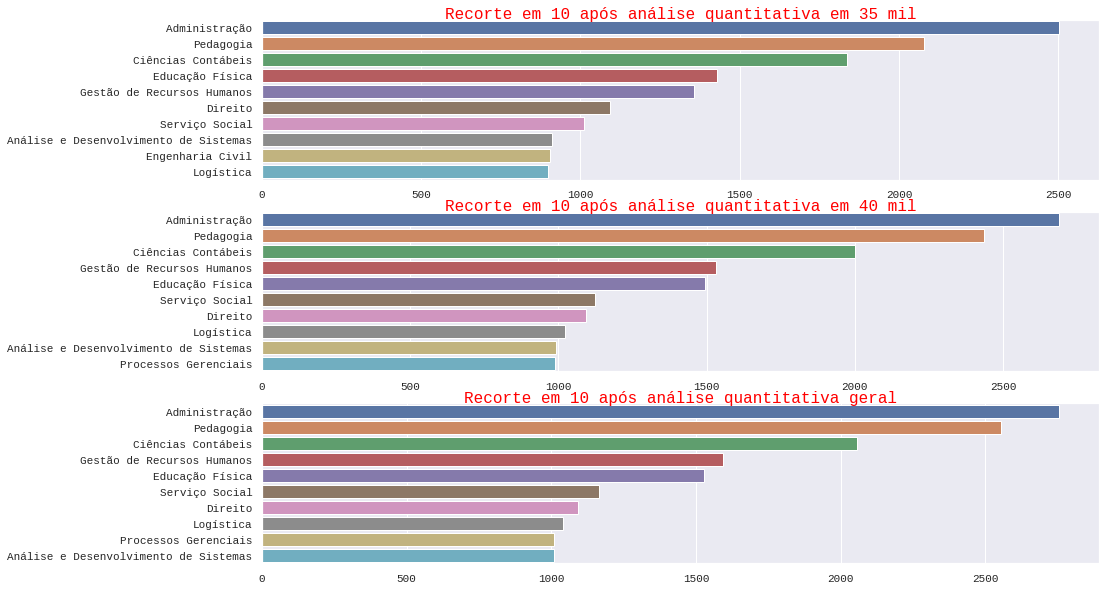

In [ ]:
 fig, axes = plt.subplots(3, 1, figsize=(15,10))
 sns.set(font='Liberation Mono')
 Cursos35kG = sns.barplot(x='value', y='variable', data=Cursos35k, ax=axes[0])
 Cursos35kG.set(ylabel=None)
 Cursos35kG.set(xlabel=None)
 Cursos35kG.set_title('Recorte em 10 após análise quantitativa em 35 mil',y =0.97,fontsize=16, color="red")
 Cursos40kG = sns.barplot(x='value', y='variable', data=Cursos40k, ax=axes[1])
 Cursos40kG.set(ylabel=None)
 Cursos40kG.set(xlabel=None)
 Cursos40kG.set_title('Recorte em 10 após análise quantitativa em 40 mil', y =0.97,fontsize=16, color="red")
 Cursos_geralG = sns.barplot(x='value', y='variable', data=Cursos_geral, ax=axes[2])
 Cursos_geralG.set(ylabel=None)
 Cursos_geralG.set(xlabel=None)
 Cursos_geralG.set_title('Recorte em 10 após análise quantitativa geral',y =0.97, fontsize=16, color="red")

# Interativo

In [ ]:
#Definindo entradas para o usuário definir o que quer encontrar
Vrm = float(input("Valor máximo da mensalidade que deseja pagar:\n"))
turno = input("Turno que deseja: \nOpções: Matutino, Vespertino, Noturno, Integral\n")
ufb = input("Estado que deseja cursar: \n")
#Utilizando loc para filtrar o dataframe
dsm = df.loc[df["mensalidade"] <= Vrm]
dsturno = dsm.loc[dsm["turno"]== turno]
dsuf = dsturno.loc[dsturno["uf_busca"]== ufb]
#Mostrando quantas opções eles teriam e o dataframe
print("Número de opções dentro dos pré-requisitos:", dsuf.shape[0])
dsuf

Valor máximo da mensalidade que deseja pagar:
5465
Turno que deseja: 
Opções: Matutino, Vespertino, Noturno, Integral
Matutino
Estado que deseja cursar: 
SP
Número de opções dentro dos pré-requisitos: 1751


,Índice de elitização,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Indice_de_elitização
267,-0.010043,Bacharelado,Matutino,3036.1,19.0,35.0,0.0,0.0,Direito,Sao Paulo,SP,Pontifícia Universidade Católica de São Paulo ...,SÃO PAULO - SEDE - CAMPUS MONTE ALEGRE - Perdizes,Direito,696.92,681.70,0.0,0.0,-0.010043
277,0.011902,Bacharelado,Matutino,2997.3,3.0,7.0,0.0,0.0,Relações Internacionais,Sao Paulo,SP,Pontifícia Universidade Católica de São Paulo ...,SÃO PAULO - SEDE - CAMPUS MONTE ALEGRE - Perdizes,Relações Internacionais,703.96,686.36,0.0,0.0,0.011902
279,0.008334,Bacharelado,Matutino,2990.0,6.0,11.0,0.0,0.0,Medicina Veterinária,Sao Paulo,SP,Universidade Anhembi Morumbi - UAM,CAMPUS MOOCA - Brás,Medicina Veterinária,678.70,648.56,0.0,0.0,0.008334
280,0.011674,Bacharelado,Matutino,2957.0,3.0,7.0,0.0,0.0,Arquitetura e Urbanismo,Sao Paulo,SP,Universidade Presbiteriana Mackenzie - MACKENZIE,CAMPUS - SÃO PAULO - CONSOLAÇÃO - Consolação,Arquitetura e Urbanismo,696.82,687.30,0.0,0.0,0.011674
313,0.010368,Bacharelado,Matutino,2726.0,0.0,10.0,0.0,0.0,Fonoaudiologia,Campinas,SP,Pontifícia Universidade Católica de Campinas -...,CAMPUS II - Jardim Ipaussurama,Fonoaudiologia,632.64,0.00,0.0,0.0,0.010368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26535,0.000268,Tecnológico,Matutino,300.0,1.0,1.0,1.0,3.0,Gestão de Recursos Humanos,Itapevi,SP,Faculdade Aliança Educacional do Estado de São...,FACULDADE ALIANÇA EDUCACIONAL DO ESTADO DE SÃO...,Gestão de Recursos Humanos,526.88,495.96,450.0,450.0,0.000268
37192,-0.000608,Licenciatura,Matutino,249.0,1.0,3.0,0.0,0.0,Letras - Inglês,Sao Paulo,SP,Universidade Nove de Julho - UNINOVE,MEMORIAL - Barra Funda,Letras - Inglês,587.78,564.52,0.0,0.0,-0.000608
37194,-0.000104,Licenciatura,Matutino,249.0,1.0,2.0,0.0,0.0,Letras - Inglês,Sao Paulo,SP,Universidade Nove de Julho - UNINOVE,SANTO AMARO - Santo Amaro,Letras - Inglês,565.48,550.80,0.0,0.0,-0.000104
37196,-0.000104,Licenciatura,Matutino,249.0,1.0,2.0,0.0,0.0,Letras - Inglês,Sao Paulo,SP,Universidade Nove de Julho - UNINOVE,VILA PRUDENTE - Vila Prudente,Letras - Inglês,529.86,534.58,0.0,0.0,-0.000104


In [ ]:
 df500 = df.head(500)
 # Pegando a variável do usuário
 Z = input("Digite o nome de um curso e veja se ele está na lista dos 500 mais elitizados! \n (lembre-se de utilizar a primeira letra maiúscula\n")
 #Definindo a variável i para buscar dentro da varíavel df500 na coluna de cursos
 i = df500.loc[df500["curso_busca"]==Z]
 # definindo a quantidade de linhas que aparecerão no input
 l = i.shape[0]
 # se l não tiver linhas vamos mostrar que não tem
if l == 0:
  print("Não têm")
 # se 
else:
    print("Têm")

Digite o nome de um curso e veja se ele está na lista dos 500 mais elitizados! 
 (lembre-se de utilizar a primeira letra maiúscula
Gestão de projetos
Não têm
